In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('seaborn-ticks')
pd.options.display.float_format = '{:.1f}'.format


In [2]:
order_data = pd.read_csv('Datasets/Order.csv')
customer_data = pd.read_csv('Datasets/Customer.csv')
calender_data = pd.read_csv('Datasets/Calendar.csv')

In [3]:
order_data.shape

(3613185, 10)

In [4]:
customer_data.shape

(509693, 15)

##### Order Data

In [5]:
order_data.head()

,identifier,Brand,Account_Year_Week,Week_Ending,Channel,online_device_type_detail,Account_Type2,Gross_Demand_Pre,New_Cust,Product_dept
0,37295,LAI,201652,23DEC2016,Online,TABLET,Credit,27.0,Y,Dept G
1,315441,LEX,201615,08APR2016,Online,DESKTOP,Credit,30.4,Y,Dept A
2,489894,LEX,201649,02DEC2016,Online,MOBILE,Credit,129.0,Y,Dept B
3,419603,LEX,201651,16DEC2016,Online,DESKTOP,Credit,22.0,Y,Dept C
4,431206,LAI,201547,20NOV2015,Online,MOBILE,Cash,29.8,Y,Dept D


In [6]:
#prettifying week column
order_data['Account_Year_Week'] =  order_data['Account_Year_Week'].apply(lambda x: (str(x)[:4] + '-' + str(x)[4:]))

In [7]:
#There are no duplicated rows 
order_data[order_data.duplicated()]

,identifier,Brand,Account_Year_Week,Week_Ending,Channel,online_device_type_detail,Account_Type2,Gross_Demand_Pre,New_Cust,Product_dept


In [8]:
order_data['identifier'].nunique()

376746

There are 376746 distict customer in the order data.

In [9]:
#check missing values
order_data.isna().sum()

identifier                        0
Brand                             0
Account_Year_Week                 0
Week_Ending                       0
Channel                           0
online_device_type_detail    216436
Account_Type2                     0
Gross_Demand_Pre                  0
New_Cust                          0
Product_dept                      0
dtype: int64

In [10]:
#only Price and id columns are numeric.
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613185 entries, 0 to 3613184
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   identifier                 int64  
 1   Brand                      object 
 2   Account_Year_Week          object 
 3   Week_Ending                object 
 4   Channel                    object 
 5   online_device_type_detail  object 
 6   Account_Type2              object 
 7   Gross_Demand_Pre           float64
 8   New_Cust                   object 
 9   Product_dept               object 
dtypes: float64(1), int64(1), object(8)
memory usage: 275.7+ MB


In [11]:
order_data.describe()

,identifier,Gross_Demand_Pre
count,3613185.0,3613185.0
mean,254709.7,60.0
std,147125.2,110.7
min,1.0,0.0
25%,127797.0,15.0
50%,254003.0,27.0
75%,382147.0,53.0
max,510000.0,7750.0


Average price for orders is 60 Pounds. The median is 27. There are some items that have 0 price. We can look into it.

In [12]:
order_data[order_data['Gross_Demand_Pre'] == 0]

,identifier,Brand,Account_Year_Week,Week_Ending,Channel,online_device_type_detail,Account_Type2,Gross_Demand_Pre,New_Cust,Product_dept
70,285934,LEX,2015-47,20NOV2015,Online,TABLET,Cash,0.0,Y,Dept B
116,203510,LAI,2016-49,02DEC2016,Online,TABLET,Credit,0.0,Y,Dept C
327,247089,LEX,2016-46,11NOV2016,Online,MOBILE,Credit,0.0,N,Dept B
751,135484,LEX,2015-46,13NOV2015,Online,DESKTOP,Credit,0.0,N,Dept B
1153,337505,LEX,2015-50,11DEC2015,Online,MOBILE,Credit,0.0,Y,Dept B
...,...,...,...,...,...,...,...,...,...,...
3612275,226371,LEX,2016-47,18NOV2016,Online,DESKTOP,Credit,0.0,N,Dept B
3612298,241930,LAI,2015-39,25SEP2015,Online,DESKTOP,Credit,0.0,Y,Dept B
3612796,454822,LAI,2015-03,16JAN2015,Online,DESKTOP,Credit,0.0,N,Dept F
3612831,255878,LAI,2016-41,07OCT2016,Online,MOBILE,Credit,0.0,N,Dept B


There are 43387 orders that have 0 price. We can drop those. 

In [13]:
#dropping rows with 0 price
order_data = order_data[~(order_data['Gross_Demand_Pre'] == 0)]

In [14]:
#description for categorical columns
order_data.describe(include='object')

,Brand,Account_Year_Week,Week_Ending,Channel,online_device_type_detail,Account_Type2,New_Cust,Product_dept
count,3569798,3569798,3569798,3569798,3355601,3569798,3569798,3569798
unique,2,157,157,2,3,2,2,11
top,LEX,2016-48,25NOV2016,Online,MOBILE,Credit,N,Dept A
freq,2668566,83545,83545,3480565,1719421,3242422,2005100,912006


In [15]:
categorical_columns = ['Brand','Channel','online_device_type_detail','Account_Type2','New_Cust','Product_dept']

for i in categorical_columns:
    print(order_data[i].value_counts(normalize=True) * 100)
    print('\n')

LEX   74.8
LAI   25.2
Name: Brand, dtype: float64


Online    97.5
Offline    2.5
Name: Channel, dtype: float64


MOBILE    51.2
DESKTOP   32.9
TABLET    15.8
Name: online_device_type_detail, dtype: float64


Credit   90.8
Cash      9.2
Name: Account_Type2, dtype: float64


N   56.2
Y   43.8
Name: New_Cust, dtype: float64


Dept A   25.5
Dept B   20.5
Dept D   13.7
Dept C   13.6
Dept E    8.4
Dept F    7.5
Dept G    7.2
Dept H    3.0
Dept I    0.4
Dept S    0.1
Dept X    0.0
Name: Product_dept, dtype: float64




In [16]:
print(order_data['Account_Year_Week'].min(), order_data['Account_Year_Week'].max())

2014-01 2016-53


We have 3 years of order data between 2014 and 2016. Almost %75 of sales are coming from Very and %25 coming from LittleWoods. As it is expected %97.5 of orders are online. %51.2 of Customers use mobile platforms when they order. I found quite interesting that %90.8 of orders are from credit accounts, wherese only %9.2 with cash. Also, %56.2 of customers are existing customers where %43.8 are new customers. Lastly, most orders belong to Departmant A and B with %46 of all orders. 

In [17]:
#Let's calculate weekly total sales revenue
weekly_total_sales_rev= order_data.groupby(['Account_Year_Week'])['Gross_Demand_Pre'].sum().to_frame() / 1000000

In [18]:
weekly_total_sales_rev.head(5)

,Gross_Demand_Pre
Account_Year_Week,
2014-01,0.1
2014-02,0.4
2014-03,0.4
2014-04,0.4
2014-05,0.4


NameError: name 'weekly_total_price' is not defined

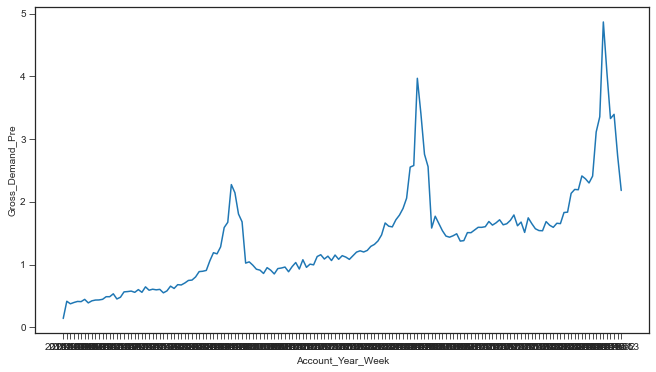

In [19]:
fig = plt.figure(figsize=(11,6)) #figuresize
ax = sns.lineplot(x='Account_Year_Week',y='Gross_Demand_Pre', data=weekly_total_sales_rev)

plt.ticklabel_format(style='plain', axis='y') #converting yticks from scientific to plain
ax.set(xticks=weekly_total_price.index[0::12]) #preventing xticks from overlapping each other

#axis labels and title
plt.title('Weekly Total Revenue', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue (Million Pounds)', fontsize=15)
plt.xticks(rotation=12, fontsize=10)
plt.yticks(fontsize=12)

plt.show()

There are 3 years of data starting from first week of 2014. We can see that there is an inreasing trend. It is standing out that there are peaks towards the end of every year. I assume that those dates correspond to around the time of Black Friday events. 

In [20]:
#Weekly total # of orders
weekly_total_number_orders= order_data.groupby(['Account_Year_Week'])['Gross_Demand_Pre'].count().to_frame().reset_index()

NameError: name 'weekly_total_price' is not defined

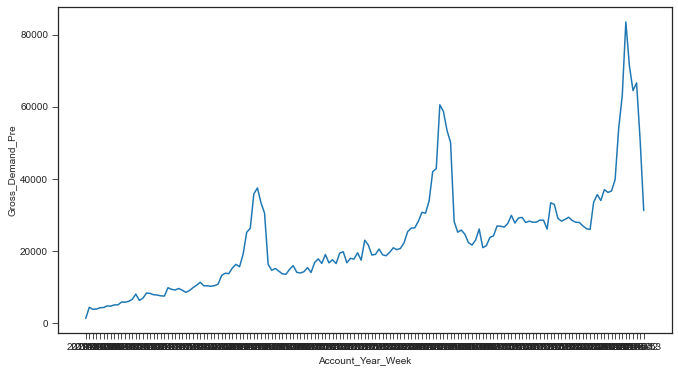

In [21]:
fig = plt.figure(figsize=(11,6)) #figuresize
ax = sns.lineplot(x='Account_Year_Week',y='Gross_Demand_Pre', data=weekly_total_number_orders)

plt.ticklabel_format(style='plain', axis='y') #converting yticks from scientific to plain
ax.set(xticks=weekly_total_price.index[0::12]) #preventing xticks from overlapping each other

#axis labels and title
plt.title('Weekly Total # of Orders', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=12, fontsize=10)
plt.yticks(fontsize=12)

plt.show()

The same pattern can also be seen in the number of orders.

In [ ]:
#average revenue per order
avg_revenue = order_data.groupby(['Account_Year_Week'])['Gross_Demand_Pre'].mean().reset_index()

fig = plt.figure(figsize=(11,6)) #figuresize
ax = sns.lineplot(x='Account_Year_Week',y='Gross_Demand_Pre', data=avg_revenue)

plt.ticklabel_format(style='plain', axis='y') #converting yticks from scientific to plain
ax.set(xticks=avg_revenue['Account_Year_Week'][0::12]) #preventing xticks from overlapping each other

#axis labels and title
plt.title('Average Revenue Per Order', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.xticks(rotation=12, fontsize=10)
plt.yticks(fontsize=12)

plt.show()

While the average revenue per of order was around 100 Pounds at the beginning of 2014, then it is fluctuating around 60 Pounds.

In [ ]:
#Let's investigate the credit accounts deeper.
account_type_count = order_data.groupby('Account_Type2')['identifier'].count() / len(order_data) * 100 
account_type_count = account_type_count.reset_index()
account_type_order_price =  order_data.groupby('Account_Type2')['Gross_Demand_Pre'].sum() / 1000000
account_type_order_price = account_type_order_price.reset_index()

#time series for count percentage of credit account
account_type_count_credit_ts = order_data.groupby(['Account_Year_Week','Account_Type2'])['identifier'].count()  
account_type_count_credit_ts = account_type_count_credit_ts.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame()
account_type_count_credit_ts.reset_index(inplace=True)
credit_count_data = account_type_count_credit_ts[account_type_count_credit_ts['Account_Type2'] == 'Credit']
cash_count_data = account_type_count_credit_ts[account_type_count_credit_ts['Account_Type2'] == 'Cash']


#time series for price percentage of credit account
account_type_price_credit_ts = order_data.groupby(['Account_Year_Week','Account_Type2'])['Gross_Demand_Pre'].sum()  
account_type_price_credit_ts = account_type_price_credit_ts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
account_type_price_credit_ts = account_type_price_credit_ts.reset_index()
credit_amount_data = account_type_price_credit_ts[account_type_price_credit_ts['Account_Type2'] == 'Credit']
cash_amount_data = account_type_price_credit_ts[account_type_price_credit_ts['Account_Type2'] == 'Cash']



In [ ]:
#function for annotating plots
def annotater(graph):
    for p in graph.patches:
        graph.annotate('{:.1f}'.format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', fontsize=12)

In [ ]:
#plots for Account types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1 = sns.barplot(x='Account_Type2', y='identifier', data=account_type_count, ax=ax1)
ax1.set_xlabel("Account Type", fontsize=15)
ax1.set_ylabel("Percentage", fontsize=15)
ax1.set_title("Percentange of Account Types (Number of Transaction)", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
annotater(ax1)


ax2 = sns.barplot(x='Account_Type2', y='Gross_Demand_Pre', data=account_type_order_price, ax=ax2)
ax2.set_xlabel("Account Type", fontsize=15)
ax2.set_ylabel("Million Pounds", fontsize=15)
ax2.set_title("Total Amount Paid from Account Types", fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
annotater(ax2)

plt.show()

In [ ]:
#time series plots for Credit Accounts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1 = sns.lineplot(x='Account_Year_Week', y='identifier', data=credit_count_data, ax=ax1)
ax1.set(xticks=credit_count_data['Account_Year_Week'][0::(len(credit_count_data) // 10)])
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("Percentage", fontsize=15)
ax1.set_title("Percentage of Credit Accounts in Count of Transactions", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2 = sns.lineplot(x='Account_Year_Week', y='Gross_Demand_Pre', data=credit_amount_data, ax=ax2)
ax2.set(xticks=credit_amount_data['Account_Year_Week'][0::(len(credit_amount_data) // 10)])
ax2.set_xlabel("Date", fontsize=15)
ax2.set_ylabel("Million Pounds", fontsize=15)
ax2.set_title("Total Amount Paid from Credit Account", fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
#time series plots for Cash Account 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1 = sns.lineplot(x='Account_Year_Week', y='identifier', data=cash_count_data, ax=ax1)
ax1.set(xticks=cash_count_data['Account_Year_Week'][0::(len(cash_count_data) // 10)])
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("Percentage", fontsize=15)
ax1.set_title("Percentage of Cash Accounts in Count of Transactions", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2 = sns.lineplot(x='Account_Year_Week', y='Gross_Demand_Pre', data=cash_amount_data, ax=ax2)
ax2.set(xticks=cash_amount_data['Account_Year_Week'][0::(len(cash_amount_data) // 10)])
ax2.set_xlabel("Date", fontsize=15)
ax2.set_ylabel("Million Pounds", fontsize=15)
ax2.set_title("Total Amount Paid from Cash Accounts", fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

Especially after first quarter of 2014, the usage of credit account is around %90 and generally stationary. The same pattern is valid for amount paid by credit accounts.  

In [22]:
#total revenue by Brand
revenue_brand = order_data.groupby('Brand')['Gross_Demand_Pre'].sum() / sum(order_data['Gross_Demand_Pre']) * 100
revenue_brand

Brand
LAI   31.7
LEX   68.3
Name: Gross_Demand_Pre, dtype: float64

Although %74.8 of orders are coming from Very,  %68.3 of total revenue belongs to Very. We can say that unit order price for Littlewoords is higher. 

NameError: name 'annotater' is not defined

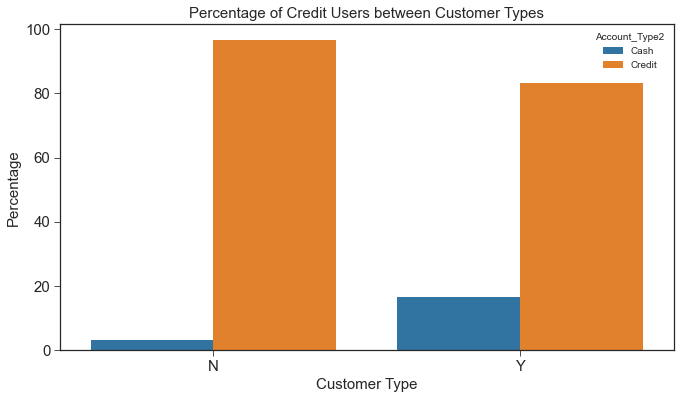

In [23]:
#new customers account type
new_cust_group = order_data.groupby(['New_Cust','Account_Type2'])['identifier'].count()
new_cust_group = new_cust_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame() #to get the percentages
new_cust_group.reset_index(inplace=True)


fig = plt.figure(figsize=(11,6)) #figuresize
ax = sns.barplot(x='New_Cust', y='identifier', hue='Account_Type2', data=new_cust_group)
ax.set_xlabel("Customer Type", fontsize=15)
ax.set_ylabel("Percentage", fontsize=15)
ax.set_title("Percentage of Credit Users between Customer Types", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
annotater(ax)
plt.show()

It is noticable that the cash account usage in existing customers is %3.3, whereas new customers tend to use more cash account (%16.7).

In [29]:
#Let's investige customer type data further
customer_type_revenue = order_data.groupby(['Account_Year_Week','New_Cust'])['Gross_Demand_Pre'].sum().reset_index()
customer_type_revenue['Gross_Demand_Pre'] = customer_type_revenue['Gross_Demand_Pre'] / 1000000
new_cust = customer_type_revenue[customer_type_revenue['New_Cust'] == 'Y']
old_cust = customer_type_revenue[customer_type_revenue['New_Cust'] == 'N']

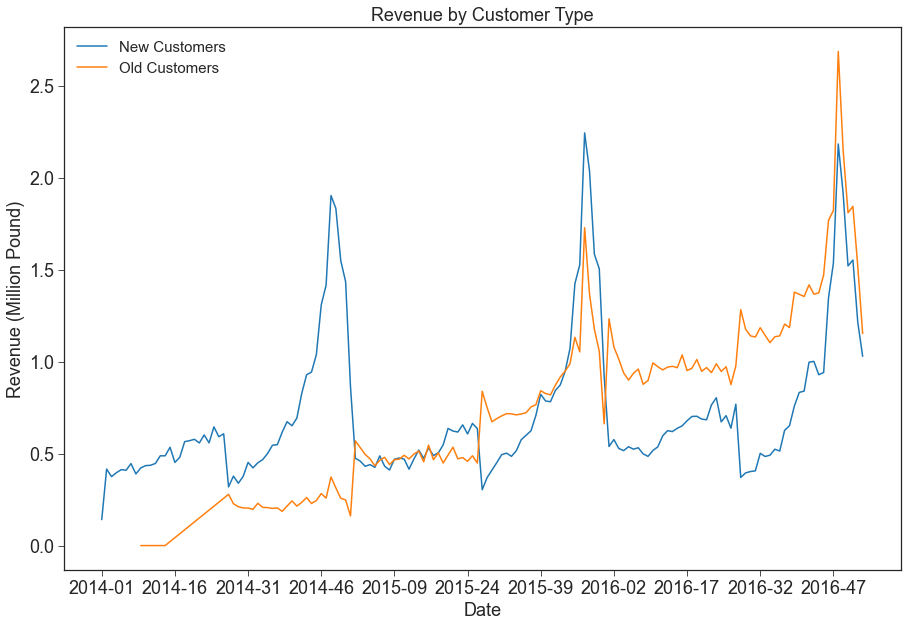

In [30]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.lineplot(x='Account_Year_Week', y='Gross_Demand_Pre', data=new_cust, label='New Customers')
ax1 = sns.lineplot(x='Account_Year_Week', y='Gross_Demand_Pre', data=old_cust, label='Old Customers')
ax1.set(xticks=new_cust['Account_Year_Week'][0::(len(cash_count_data) // 10)])
ax1.set_xlabel("Date", fontsize=18)
ax1.set_ylabel("Revenue (Million Pound)", fontsize=18)
ax1.set_title("Revenue by Customer Type", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=15)
plt.show()

While new customers was creating more revenue in the beginning, particularly after 2016 old customers started to create more revenue.

In [31]:
customer_type_revenue

,Account_Year_Week,New_Cust,Gross_Demand_Pre
0,2014-01,Y,0.1
1,2014-02,Y,0.4
2,2014-03,Y,0.4
3,2014-04,Y,0.4
4,2014-05,Y,0.4
...,...,...,...
286,2016-51,Y,1.6
287,2016-52,N,1.5
288,2016-52,Y,1.2
289,2016-53,N,1.2


In [32]:
#New Customer Ratio
New_customers_count = order_data[order_data['New_Cust']=='Y'].groupby(['Account_Year_Week'])['identifier'].nunique()
Old_customers_count = order_data[order_data['New_Cust']=='N'].groupby(['Account_Year_Week'])['identifier'].nunique()
ratio = (New_customers_count / Old_customers_count).dropna()[3:].reset_index()

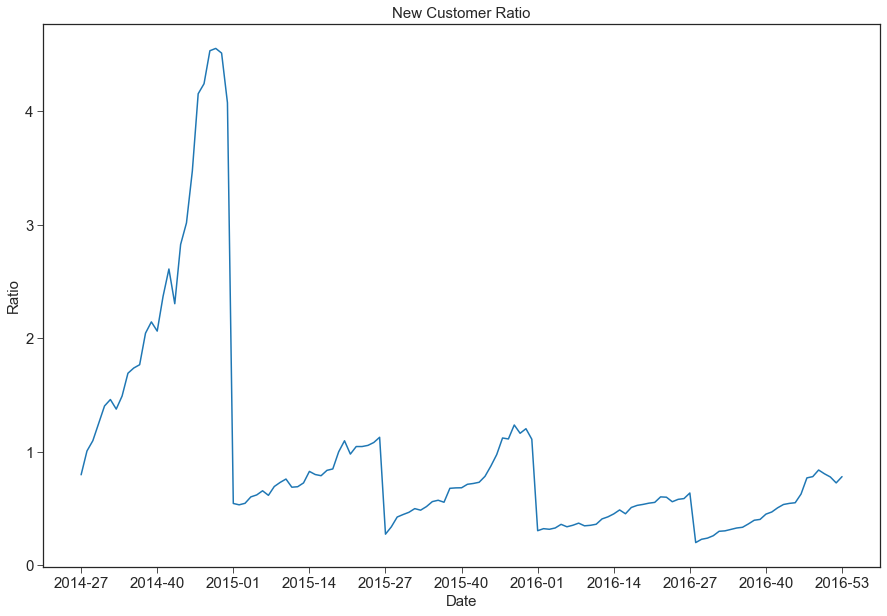

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.lineplot(x='Account_Year_Week', y='identifier', data=ratio)
ax1.set(xticks=ratio['Account_Year_Week'][0::(len(ratio) // 10)])
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("Ratio", fontsize=15)
ax1.set_title("New Customer Ratio", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In 2014, new customers was more than 4 times the old customers (I think that this is an issue with the data). After 2015, there are 2 peak moments that new customers are more than old customers. However, the new customer ratio is lower than in 2016 when compared to 2015. It could be because we retained more old customers or we gain less new customers. Let's look at it with monthly retentions.  

In [34]:
# Retention
#Firstly calculate total revenue by per customer and week
retention = order_data.groupby(['identifier','Account_Year_Week'])['Gross_Demand_Pre'].sum().reset_index() 
#Let's create a crosstab
retention = pd.crosstab(retention['identifier'],retention['Account_Year_Week']).reset_index()
retention.head()

Account_Year_Week,identifier,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2016-44,2016-45,2016-46,2016-47,2016-48,2016-49,2016-50,2016-51,2016-52,2016-53
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#This code calculates user counts for the previous weeks and current week
weeks = retention.columns[1:]
retention_list = []
for i in range(len(weeks)-1):
    retention_data = {}
    selected_week = weeks[i+1]
    previous_week = weeks[i]
    retention_data['Week'] = selected_week
    retention_data['Total_Customer_Count'] = retention[selected_week].sum()
    retention_data['Retained_Customer_Count'] = retention[(retention[selected_week]>0) & (retention[previous_week]>0)][selected_week].sum()
    retention_list.append(retention_data)

In [36]:
#Lastly calculate weekly retention rate
retention = pd.DataFrame(retention_list)
retention['Retention_Rate'] = retention['Retained_Customer_Count']/retention['Total_Customer_Count']

In [37]:
retention.head()

,Week,Total_Customer_Count,Retained_Customer_Count,Retention_Rate
0,2014-02,2389,104,0.0
1,2014-03,1920,222,0.1
2,2014-04,1953,239,0.1
3,2014-05,2118,251,0.1
4,2014-06,2118,300,0.1


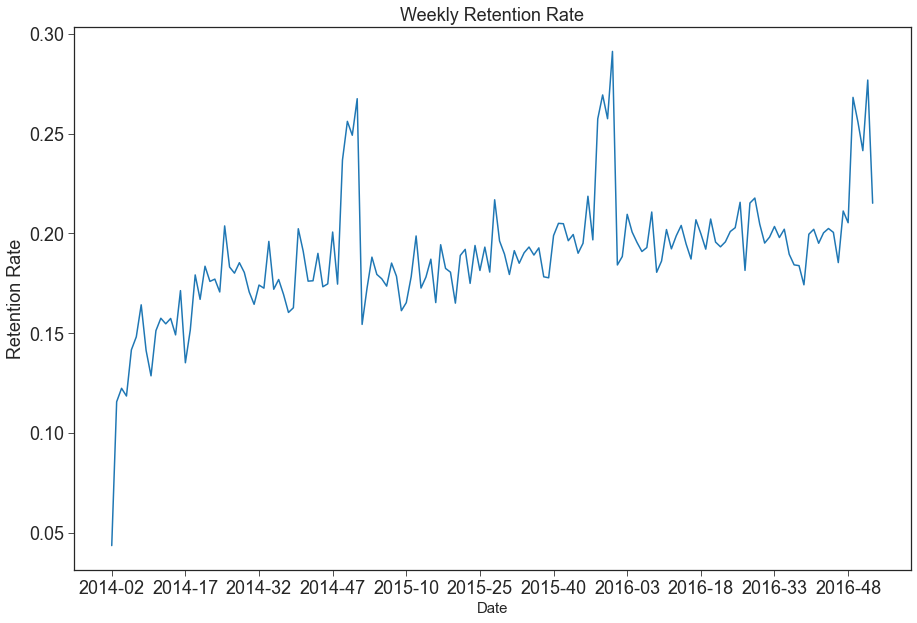

In [38]:
#plot
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.lineplot(x='Week', y='Retention_Rate', data=retention)
ax1.set(xticks=retention['Week'][0::(len(retention) // 10)])
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("Retention Rate", fontsize=18)
ax1.set_title("Weekly Retention Rate", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)
plt.show()

Weekly retention rate data has slightly increasing trend. This means that we are retaining more existing customers. 

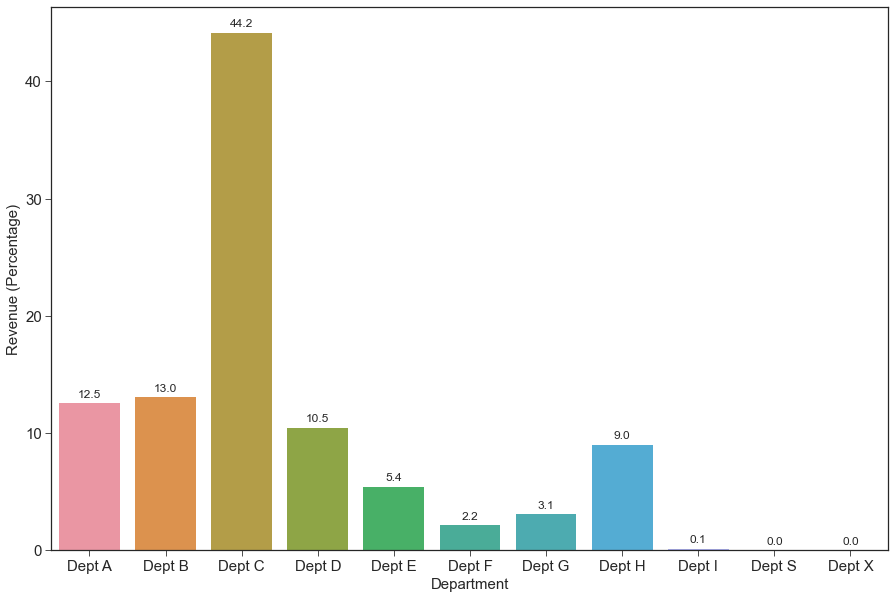

In [39]:
#total revenue by department
revenue_dept = order_data.groupby('Product_dept')['Gross_Demand_Pre'].sum() / sum(order_data['Gross_Demand_Pre']) * 100
revenue_dept = revenue_dept.reset_index()


fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.barplot(x='Product_dept', y='Gross_Demand_Pre', data=revenue_dept)
ax1.set_xlabel("Department", fontsize=15)
ax1.set_ylabel("Revenue (Percentage)", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
annotater(ax1)
plt.show()

Even though only %13.6 amount of orders is from Department C, the same deparment accounts for %44.2 of total revenue.

In [40]:
revenue_dept 

,Product_dept,Gross_Demand_Pre
0,Dept A,12.5
1,Dept B,13.0
2,Dept C,44.2
3,Dept D,10.5
4,Dept E,5.4
5,Dept F,2.2
6,Dept G,3.1
7,Dept H,9.0
8,Dept I,0.1
9,Dept S,0.0


### Customer Data

In [41]:
customer_data.head()

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
0,37295,MISS,LAI,1972.0,Y1,active,NR30,19OCT2016,NaN,NaN,09MAR2017,78.0,604.4,5,0.0
1,315441,MRS,LEX,1966.0,Y1,completed,MK5,08APR2016,NaN,21JAN2017,22APR2016,3000.0,34.4,1,0.0
2,489894,MISS,LEX,1996.0,Y3,active,B 71,27AUG2016,NaN,NaN,13MAR2017,4.0,512.9,5,0.0
3,419603,MR,LEX,1946.0,Y1,active,DE73,13DEC2016,NaN,NaN,14DEC2016,1500.0,26.0,1,0.0
4,444889,MISS,LEX,1968.0,U1,active,EX10,20JUN2014,NaN,NaN,02FEB2017,0.0,424.9,2,0.0


In [42]:
#converting date columns to datetime format

def to_dt(date):
    if pd.isna(date):
        return np.nan
    else:    
        return datetime.strptime(date, '%d%b%Y' )

In [43]:
date_cols = ['date_start','date_default', 'date_completed', 'date_last_payment']

for col in date_cols:
    customer_data[col] = customer_data[col].apply(lambda x: to_dt(x))

In [44]:
print(customer_data['date_start'].min().date(),'-',customer_data['date_start'].max().date())

2014-01-01 - 2016-12-31


In [45]:
#checking for duplicated data
customer_data[customer_data.duplicated()]

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT


In [46]:
customer_data.isna().sum()

identifier                  0
title_desc                  9
principal_brand             0
birth_year                 47
credit_band                 0
status_code                 0
postcode_outward          255
date_start                  0
date_default           477886
date_completed         221487
date_last_payment      162336
open_to_buy_amt             0
LTIME_NET_SALES_AMT         0
LTIME_NO_ORDERS             0
LTIME_RETURNED_AMT          0
dtype: int64

In [47]:
customer_data.describe()

,identifier,birth_year,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
count,509693.0,509646.0,509693.0,509693.0,509693.0,509693.0
mean,255001.2,1978.6,234.0,343.2,3.5,59.3
std,147222.7,13.4,534.9,739.6,7.8,256.7
min,1.0,1900.0,-11410.0,-2024.0,0.0,0.0
25%,127500.0,1970.0,0.0,0.0,0.0,0.0
50%,255004.0,1981.0,0.0,48.0,1.0,0.0
75%,382498.0,1989.0,105.0,340.1,3.0,0.0
max,510000.0,1999.0,10000.0,28336.7,483.0,16231.2


There are customers whose birthday is 1900 (probably missing), and smaller than 0 amount of credit in the account. Also, there are customers whose lifetime net sales are smaller than 0. Let's look at them closer.

In [48]:
#There are 7 customer whose birth date is 1900, replace them with np.nan

len(customer_data[customer_data['birth_year'] == 1900])
customer_data.loc[customer_data['birth_year'] == 1900, 'birth_year'] = np.nan

In [49]:
#customers with negative credit balance
customer_data[customer_data['open_to_buy_amt'] < 0 ]

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
5,399884,MISS,LEX,1996.0,Y1,active,BT12,2016-12-17,NaT,NaT,NaT,-64.0,297.1,6,0.0
22,365544,MS,LAI,1985.0,Y4,default,CF24,2015-07-30,2016-03-10,NaT,2015-08-13,-73.0,529.4,5,0.0
41,389892,MISS,LEX,1982.0,Y3,active,M 22,2016-09-03,NaT,NaT,NaT,-222.0,134.0,1,0.0
45,140988,MISS,LEX,1991.0,Y1,active,DY8,2015-02-24,NaT,NaT,2016-06-23,-133.0,2335.8,5,0.0
59,51182,MISS,LAI,1970.0,Y5,default,NG4,2014-06-18,2015-01-08,NaT,NaT,-59.0,148.9,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509621,495892,MRS,LEX,1990.0,Y1,active,RM16,2015-10-21,NaT,NaT,2017-01-17,-29.0,952.9,7,0.0
509624,119254,MR,LEX,1987.0,Y3,default,RH11,2014-02-06,2016-02-03,NaT,2015-07-31,-46.0,1937.3,9,0.0
509653,226331,MR,LAI,1988.0,Y4,default,NP13,2015-05-30,2016-03-10,NaT,2015-09-29,-2.0,359.0,1,0.0
509666,78693,MR,LEX,1985.0,Y3,default,NE13,2015-10-19,2016-06-28,NaT,2015-12-11,-111.0,306.4,6,0.0


In [50]:
#customers with negative lifetime net sales
customer_data[customer_data['LTIME_NET_SALES_AMT'] < 0 ]

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
1175,268825,MS,LAI,1981.0,Y1,active,CR0,2015-10-30,NaT,NaT,2016-12-23,800.0,-130.4,3,0.0
3141,439118,MISS,LEX,1984.0,U3,completed,SW2,2014-12-16,NaT,2015-05-21,2015-04-18,0.0,-12.0,2,66.0
5173,364219,MS,LEX,1961.0,U1,completed,SR8,2015-11-02,NaT,2016-11-08,2015-11-02,0.0,-80.0,1,80.0
6355,491057,MISS,LEX,1983.0,U1,active,BT48,2016-11-23,NaT,NaT,2017-01-30,0.0,-93.0,1,100.0
7442,465485,MISS,LEX,1991.0,U1,completed,DE75,2015-11-27,NaT,2016-08-09,2015-11-27,0.0,-8.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499581,211792,MRS,LEX,1949.0,U1,completed,BA22,2015-03-28,NaT,2016-01-19,2015-03-28,0.0,-53.0,1,57.0
499701,179021,MS,LEX,1982.0,U1,active,NN5,2016-10-20,NaT,NaT,2016-10-20,0.0,-443.0,1,468.0
505754,297541,MRS,LEX,1977.0,U3,completed,TS10,2014-03-06,NaT,2014-04-08,2014-03-11,0.0,-31.0,2,52.0
506342,350885,MISS,LEX,1996.0,U1,active,N 3,2016-09-19,NaT,NaT,2016-09-19,0.0,-34.0,1,38.0


In [51]:
#Let's add default column
customer_data['default'] = 0

customer_data.loc[pd.isna(customer_data['date_default']) == False, 'default'] = 1

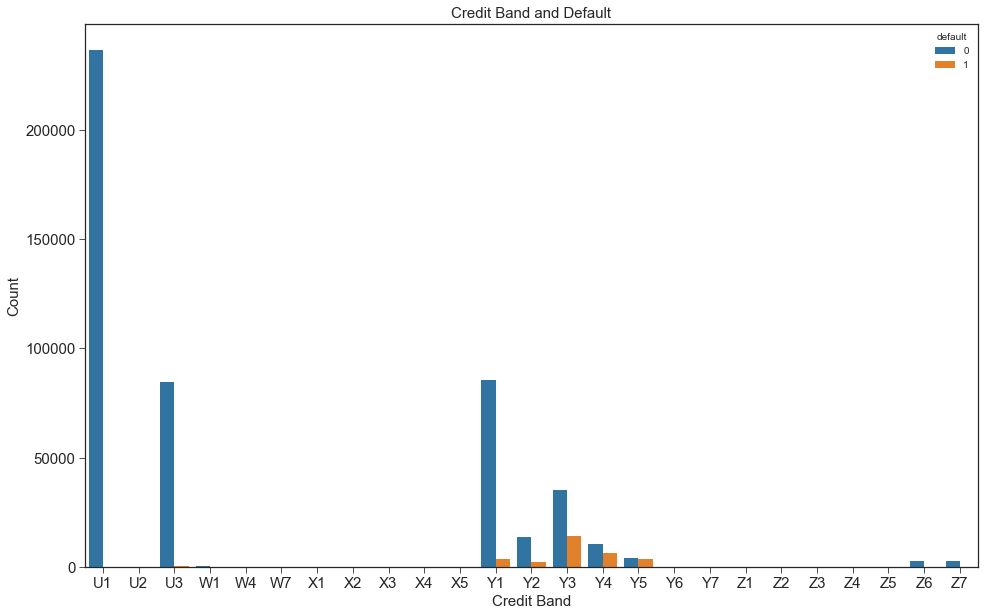

In [52]:
#plot of defaults
fig = plt.figure(figsize=(16,10)) #figuresize
ax = sns.countplot(x='credit_band', hue='default', data=customer_data, order = sorted(customer_data['credit_band'].unique()))
ax.set_xlabel("Credit Band", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Credit Band and Default", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Most default amount and rate belongs to Credit Band Y3, even though Y3 is around the middle in the hierarcy.

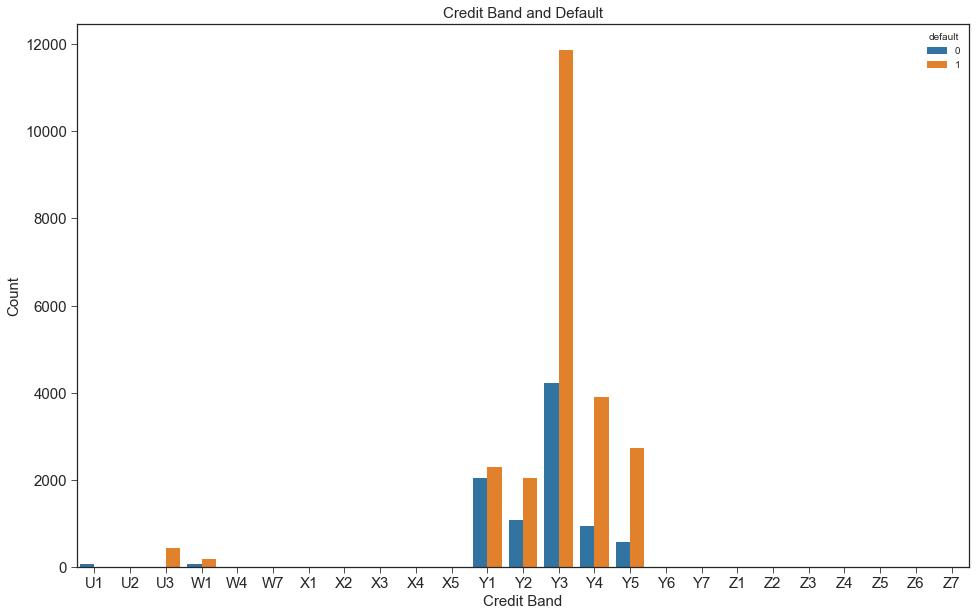

In [53]:
#Let's plot defaults where open_to_buy_amt < 0
fig = plt.figure(figsize=(16,10)) #figuresize
ax = sns.countplot(x='credit_band', hue='default', data=customer_data[customer_data['open_to_buy_amt'] < 0 ], order = sorted(customer_data['credit_band'].unique()))
ax.set_xlabel("Credit Band", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Credit Band and Default", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

This plot explains why current credit balance is smaller than 0 for some customers. I assume that the net balance goes below 0 due to extra interest rate amount. And most of the customers who has negative credit balance defaulted.

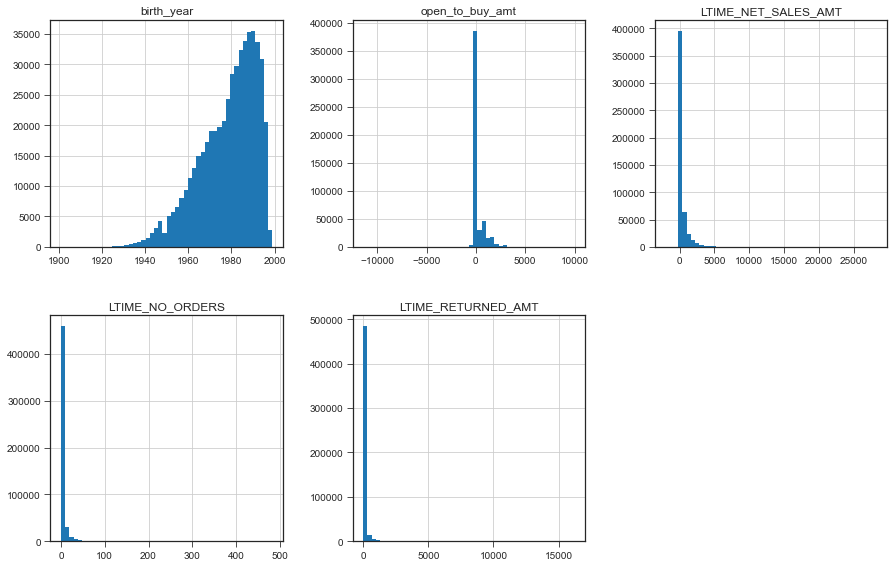

In [54]:
#Distributions of numeric columns 
numeric_cols = ['birth_year','open_to_buy_amt','LTIME_NET_SALES_AMT','LTIME_NO_ORDERS','LTIME_RETURNED_AMT']
customer_data[numeric_cols].hist(bins=50, layout=(3,3), figsize=(15, 15)) 
plt.show()

### Cluster Analysis

In [24]:
#Let's first merge customer data and order data 
# I will be using customer data for cluster analysis
customer_data.head()

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
0,37295,MISS,LAI,1972.0,Y1,active,NR30,19OCT2016,NaN,NaN,09MAR2017,78.0,604.4,5,0.0
1,315441,MRS,LEX,1966.0,Y1,completed,MK5,08APR2016,NaN,21JAN2017,22APR2016,3000.0,34.4,1,0.0
2,489894,MISS,LEX,1996.0,Y3,active,B 71,27AUG2016,NaN,NaN,13MAR2017,4.0,512.9,5,0.0
3,419603,MR,LEX,1946.0,Y1,active,DE73,13DEC2016,NaN,NaN,14DEC2016,1500.0,26.0,1,0.0
4,444889,MISS,LEX,1968.0,U1,active,EX10,20JUN2014,NaN,NaN,02FEB2017,0.0,424.9,2,0.0


Since there is no meaning to cluster closed or defaulted accounts, I will only consider active accounts. As features for clusters, I will the use number of orders, the amount of net sales and the amount of credit that is available on each customer's account. I was going to use credit band in the beginning, however after checking credit band - default value, I decided not to use it. Additionally, my main approach will be to cluster each feature separately, create scores for clusters and combine them in the end.

In [29]:
customers_active = customer_data[customer_data['status_code'] == 'active']


In [30]:
customers_active.head()

,identifier,title_desc,principal_brand,birth_year,credit_band,status_code,postcode_outward,date_start,date_default,date_completed,date_last_payment,open_to_buy_amt,LTIME_NET_SALES_AMT,LTIME_NO_ORDERS,LTIME_RETURNED_AMT
0,37295,MISS,LAI,1972.0,Y1,active,NR30,19OCT2016,NaN,NaN,09MAR2017,78.0,604.4,5,0.0
2,489894,MISS,LEX,1996.0,Y3,active,B 71,27AUG2016,NaN,NaN,13MAR2017,4.0,512.9,5,0.0
3,419603,MR,LEX,1946.0,Y1,active,DE73,13DEC2016,NaN,NaN,14DEC2016,1500.0,26.0,1,0.0
4,444889,MISS,LEX,1968.0,U1,active,EX10,20JUN2014,NaN,NaN,02FEB2017,0.0,424.9,2,0.0
5,399884,MISS,LEX,1996.0,Y1,active,BT12,17DEC2016,NaN,NaN,NaN,-64.0,297.1,6,0.0


In [31]:
from sklearn.cluster import KMeans

<ipython-input-32-72735c1b78f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_sales["clusters"] = kmeans.labels_
<ipython-input-32-72735c1b78f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_sales["clusters"] = kmeans.labels_
<ipython-input-32-72735c1b78f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

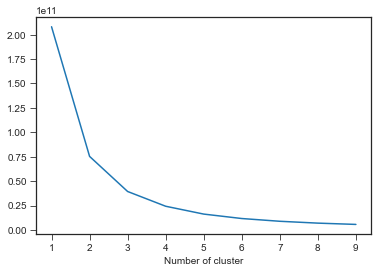

In [32]:
#Let's cluster net sales amount, K means seems proper for this task

sse={}
net_sales = customers_active[['LTIME_NET_SALES_AMT']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(net_sales)
    net_sales["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()



From the elbow graph, 4 looks like reasonable number for clusters.

In [33]:
#Fitting 4 cluster K means
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_active['LTIME_NET_SALES_AMT'].values.reshape(-1,1))
customers_active['Net_Sales_Cluster'] = kmeans.predict(customers_active['LTIME_NET_SALES_AMT'].values.reshape(-1,1))

<ipython-input-33-2cd2242bb707>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_active['Net_Sales_Cluster'] = kmeans.predict(customers_active['LTIME_NET_SALES_AMT'].values.reshape(-1,1))


In [34]:
customers_active.groupby('Net_Sales_Cluster')['LTIME_NET_SALES_AMT'].mean()

Net_Sales_Cluster
0    172.3
1   2661.2
2   1126.5
3   5591.0
Name: LTIME_NET_SALES_AMT, dtype: float64

As it can be seen, clusters are not sorted in terms of average net sales

In [76]:
#This function takes the cluster and sorts it with respect to clustered feature

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [36]:
customers_active = order_cluster('Net_Sales_Cluster', 'LTIME_NET_SALES_AMT', customers_active, ascending=True)

In [37]:
customers_active.groupby('Net_Sales_Cluster')['LTIME_NET_SALES_AMT'].mean()

Net_Sales_Cluster
0    172.3
1   1126.5
2   2661.2
3   5591.0
Name: LTIME_NET_SALES_AMT, dtype: float64

Now, they are sorted

In [38]:
#clustering credit account balance
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_active['open_to_buy_amt'].values.reshape(-1,1))
customers_active['Credit_Balance_Cluster'] = kmeans.predict(customers_active['open_to_buy_amt'].values.reshape(-1,1))
customers_active = order_cluster('Credit_Balance_Cluster', 'open_to_buy_amt', customers_active, ascending=True)

In [39]:
customers_active.groupby('Credit_Balance_Cluster')['open_to_buy_amt'].mean()

Credit_Balance_Cluster
0     44.2
1    767.9
2   1532.2
3   2818.0
Name: open_to_buy_amt, dtype: float64

This time, they are sorted

In [40]:
#clustering nunmber of orders
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_active['LTIME_NO_ORDERS'].values.reshape(-1,1))
customers_active['Number_Order_Cluster'] = kmeans.predict(customers_active['LTIME_NO_ORDERS'].values.reshape(-1,1))


In [41]:
customers_active.groupby('Number_Order_Cluster')['LTIME_NO_ORDERS'].mean()

Number_Order_Cluster
0    2.1
1   32.1
2   73.1
3   13.0
Name: LTIME_NO_ORDERS, dtype: float64

Let's sort them

In [42]:
customers_active = order_cluster('Number_Order_Cluster', 'LTIME_NET_SALES_AMT', customers_active, ascending=True)

In [43]:
customers_active.groupby('Number_Order_Cluster')['LTIME_NO_ORDERS'].mean()

Number_Order_Cluster
0    2.1
1   13.0
2   32.1
3   73.1
Name: LTIME_NO_ORDERS, dtype: float64

Now that we created clusters for all features, I will assign cluster numbers as scores, since they are all sorted we can do that.

In [44]:
#To calculate recency we need to merge with order table
merged = pd.merge(customers_active, order_data, on='identifier')

In [45]:
def parser(date):
    day = date[:2]
    month = date[2:5]
    year = date[5:]
    
    month = list(month)
    month = [val.lower()  if i>0 else val for i,val in enumerate(month)]
    month = ''.join(month)
    
    return '-'.join([day,month,year])

In [46]:
merged['Week_Ending'] = merged['Week_Ending'].apply(lambda x: parser(x))

merged['Week_Ending'] = merged['Week_Ending'].apply(lambda x: datetime.strptime(x,'%d-%b-%Y' ))

tx_user = pd.DataFrame(merged['identifier'].unique())
tx_user.columns = ['identifier']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = merged.groupby('identifier').Week_Ending.max().reset_index()
tx_max_purchase.columns = ['identifier','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate'])

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['identifier','Recency']], on='identifier')

tx_user.head()



,identifier,Recency
0,37295,7 days
1,489894,28 days
2,399884,7 days
3,47960,42 days
4,389892,112 days


In [54]:
tx_user['Recency'] = tx_user['Recency'].apply(lambda x: x.days)

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user['Recency'].values.reshape(-1,1))
tx_user['Recency_Cluster'] = kmeans.predict(tx_user['Recency'].values.reshape(-1,1))

In [60]:
tx_user.groupby('Recency_Cluster')['Recency'].mean()

Recency_Cluster
0   690.4
1   352.7
2   143.0
3    28.7
Name: Recency, dtype: float64

In [59]:
tx_user = order_cluster('Recency_Cluster', 'Recency', tx_user, ascending=False)

In [62]:
customers_active['identifier'].nunique()

189680

In [63]:
tx_user['identifier'].nunique()

165976

In [64]:
#now merge recency and customer table

customers_active = pd.merge(customers_active, tx_user, on='identifier')

In [65]:
customers_active['identifier'].nunique()

165976

In [66]:
## Now let's calculate overall scores
customers_active['Overall_Score'] = customers_active['Net_Sales_Cluster'] + \
                                    customers_active['Credit_Balance_Cluster'] + \
                                    customers_active['Number_Order_Cluster'] + \
                                    customers_active['Recency_Cluster']

In [69]:
customers_active.groupby('Overall_Score')[['LTIME_NET_SALES_AMT','open_to_buy_amt','LTIME_NO_ORDERS','Recency']].mean()

,LTIME_NET_SALES_AMT,open_to_buy_amt,LTIME_NO_ORDERS,Recency
Overall_Score,,,,
0,268.9,64.3,2.6,711.4
1,354.7,169.2,2.8,436.8
2,204.9,123.3,2.0,180.8
3,214.3,167.9,2.2,67.7
4,466.2,691.5,4.1,67.1
5,879.8,842.7,8.3,54.2
6,1290.0,1028.0,12.6,40.2
7,1973.9,998.9,19.9,31.7
8,2720.8,1176.3,27.5,26.2


The overall score 0 correspons to least important customers and 12 corresponds to most important customers. We can create bins as low value customers, mid value customers, high value customers and the customers that we do not want to lose. 

In [70]:
customers_active['Customer_Segment'] = 'Low_Value_Cust'
customers_active.loc[customers_active['Overall_Score']>4,'Customer_Segment'] = 'Mid_Value_Cust' 
customers_active.loc[customers_active['Overall_Score']>7,'Customer_Segment'] = 'High_Value_Cust' 
customers_active.loc[customers_active['Overall_Score']>9,'Customer_Segment'] = 'We_better_not_lose_them' 


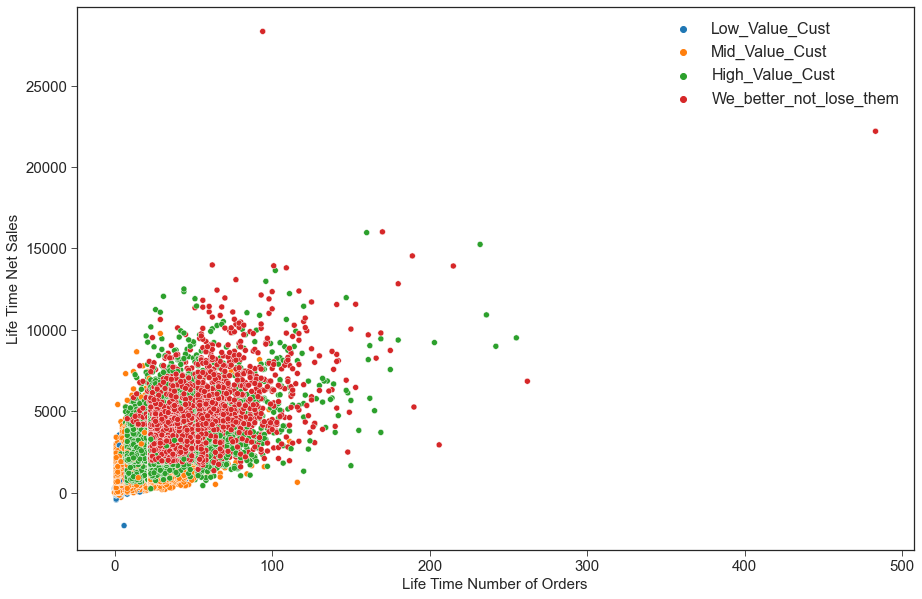

In [71]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.scatterplot(x='LTIME_NO_ORDERS', y='LTIME_NET_SALES_AMT', hue='Customer_Segment', data=customers_active)
ax1.set_xlabel("Life Time Number of Orders", fontsize=15)
ax1.set_ylabel("Life Time Net Sales", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=16)
plt.show()

In [72]:
customers_active['Customer_Segment'].value_counts()

Low_Value_Cust             103475
Mid_Value_Cust              51140
High_Value_Cust              9274
We_better_not_lose_them      2087
Name: Customer_Segment, dtype: int64

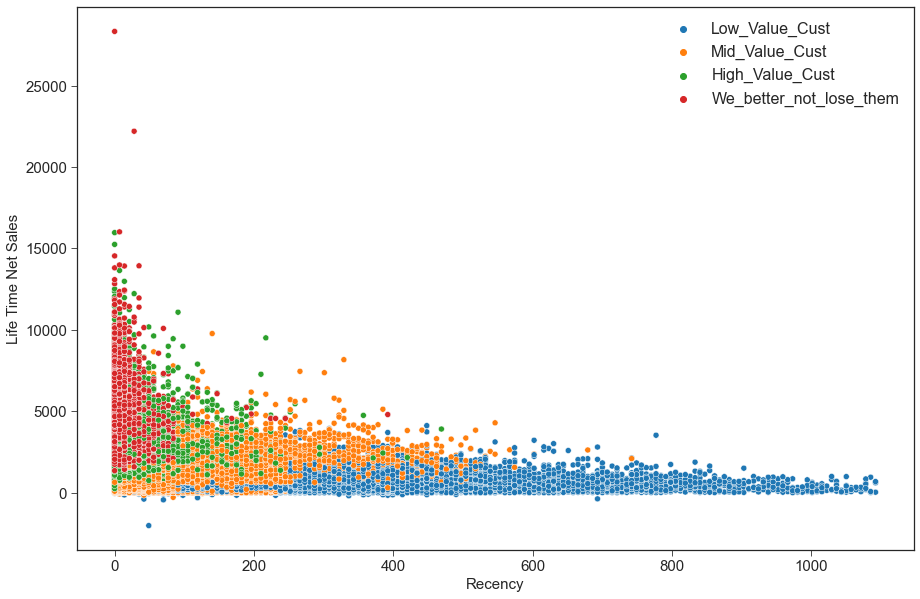

In [78]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = sns.scatterplot(x='Recency', y='LTIME_NET_SALES_AMT', hue='Customer_Segment', data=customers_active)
ax1.set_xlabel("Recency", fontsize=15)
ax1.set_ylabel("Life Time Net Sales", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=16)
plt.show()